# KNN in sklearn

K-nearest neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. 

In this notebook we will have a look at how you can train a k-nearest neighbor model using the sklearn library. We will use the breast cancer data set, which is also a "toy" data set provided by `sklearn.datasets`.

At the end of the notebook you should know:
* how to apply KNN with sklearn
* what hyperparameter you can tweak in the knn model (only the most important)

## Setup and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## The Algorithm 

KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.

Some **pros** and **cons** of KNN:

#### Pros

* No assumptions about data
* Simple algorithm — easy to understand
* Can be used for classification and regression


#### Cons

* High memory requirement — All of the training data must be present in memory in order to calculate the closest K neighbors
* Sensitive to irrelevant features
* Sensitive to the scale of the data since we’re computing the distance to the closest K points

## Example

Let’s take a look at how we could go about classifying data using the K-nearest neighbors algorithm in Python. 

For this tutorial, we’ll be using the breast cancer dataset from the `sklearn.datasets` module. The dataset classifies tumors into two categories (malignant and benign) and contains about 30 features. In the real world, you’d look at the correlations and select a subset of features that plays the greatest role in determining whether a tumor is malignant or not. However, for the sake of simplicity, we’ll pick a couple at random (Feel free to have a look at the data, print the correlations and choose the most appropriate features). 
If you choose a categorical feature it needs to be encoded to be interpreted by the model.

In [9]:
# Load data
breast_cancer = load_breast_cancer()

# Define two features randomly
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
X.head()

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280


In [17]:
# Target variable
print(breast_cancer.target_names)
breast_cancer.target[:30]

['malignant' 'benign']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

Right now our target variable is stored as 0 (for malignant) and 1 (for benign). We could replace it with the target names, but since the confusion matrix will (as default) show 0 and 1 as class labels, we will stick to the encoded version. Since our aim is to predict malignant tumors and usually the class we are interested in is encoded as class 1, we will flip the values for malignant and benign. 

In [18]:
# Change values for malignant from 0 to 1 
y = pd.DataFrame(breast_cancer.target, columns=["target"])
y['target'] = y['target'].replace({0: 1, 1: 0})

In [19]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

The sklearn library has provided a layer of abstraction on top of Python. 
Therefore, in order to make use of the KNN algorithm, it’s sufficient to create an instance of `KNeighborsClassifier`. 
By default, the KNeighborsClassifier looks for the 5 nearest neighbors. 
We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [20]:
# Train model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

Accuracy: 0.85
Recall: 0.76
--------------------------------------------------


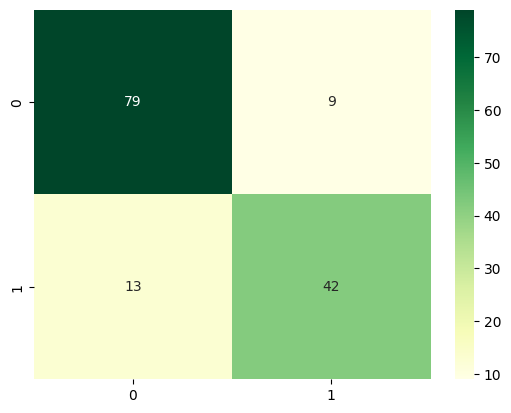

In [21]:
# Predict on test set
y_pred = knn.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred).round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

## Check your understanding:

- What hyperparameter can you change in order to improve (or deteriorate) your model? 
- If you're not sure about the hyperparameter of the KNN model, have a look at the sklearn documentation.
- Tweak some of them to get a better feeling of what will change if you do so.

#### My answers

1. The main hyperparameter in KNN is the number of neighbors n_neighbors (K). Changing K affects the bias–variance tradeoff: small values of K can lead to overfitting, while large values of K can lead to underfitting. Other hyperparameters, such as the distance metric or weighting scheme, can also influence model performance.

In [22]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# 1) Define model
knn = KNeighborsClassifier(metric="euclidean")

# 2) Define search space for K
param_grid = {"n_neighbors": list(range(1, 51, 2))}  # odd K to reduce tie votes

# 3) Grid search with cross-validation on TRAIN only
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="recall",   # change to "accuracy" or "f1" if you prefer
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, np.ravel(y_train))

print("Best K:", grid.best_params_["n_neighbors"])
print("Best CV recall:", round(grid.best_score_, 3))

# 4) Evaluate best model on TEST
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred_best), 2))
print("Test Recall:", round(recall_score(y_test, y_pred_best), 2))

cm = confusion_matrix(y_test, y_pred_best)
cm


Best K: 3
Best CV recall: 0.79
Test Accuracy: 0.83
Test Recall: 0.8


array([[75, 13],
       [11, 44]], dtype=int64)

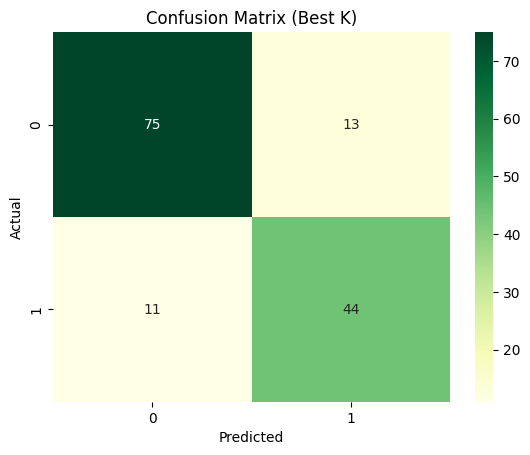

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap="YlGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best K)")
plt.show()


Tweaking some of hyperparameters to get a better feeling of what will change:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import pandas as pd

configs = [
    {"name": "K=5 euclidean uniform",  "n_neighbors": 5, "metric": "euclidean",  "weights": "uniform"},
    {"name": "K=5 manhattan uniform",  "n_neighbors": 5, "metric": "manhattan",  "weights": "uniform"},
    {"name": "K=5 euclidean distance", "n_neighbors": 5, "metric": "euclidean",  "weights": "distance"},
    {"name": "K=3 euclidean uniform",  "n_neighbors": 3, "metric": "euclidean",  "weights": "uniform"},
]

rows = []
for cfg in configs:
    knn = KNeighborsClassifier(
        n_neighbors=cfg["n_neighbors"],
        metric=cfg["metric"],
        weights=cfg["weights"]
    )
    knn.fit(X_train, y_train.values.ravel() if hasattr(y_train, "values") else y_train)
    y_pred = knn.predict(X_test)

    rows.append({
        "Model": cfg["name"],
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
    })

results_manual = pd.DataFrame(rows).sort_values(by="Recall", ascending=False)
results_manual


,Model,Accuracy,Recall,F1
3,K=3 euclidean uniform,0.832168,0.800000,0.785714
0,K=5 euclidean uniform,0.846154,0.763636,0.792453
1,K=5 manhattan uniform,0.846154,0.763636,0.792453
2,K=5 euclidean distance,0.783217,0.709091,0.715596


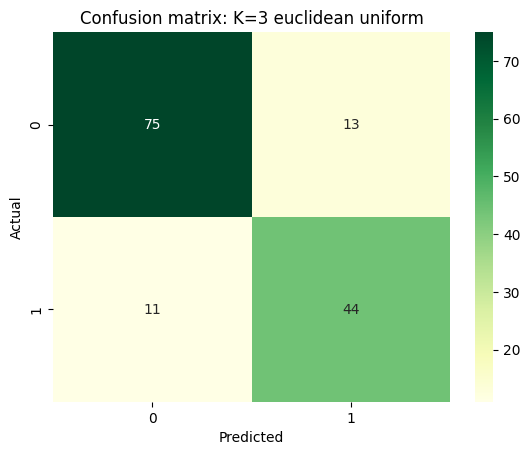

In [26]:
# Confusion matrix of the best model:

best_name = results_manual.iloc[0]["Model"]
best_cfg = next(c for c in configs if c["name"] == best_name)

best_knn = KNeighborsClassifier(
    n_neighbors=best_cfg["n_neighbors"],
    metric=best_cfg["metric"],
    weights=best_cfg["weights"]
)
best_knn.fit(X_train, y_train.values.ravel() if hasattr(y_train, "values") else y_train)
y_pred_best = best_knn.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap="YlGn")
plt.title(f"Confusion matrix: {best_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best params: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}
Best CV score: 0.841
Test Accuracy: 0.87
Test Recall: 0.73
Test F1: 0.81


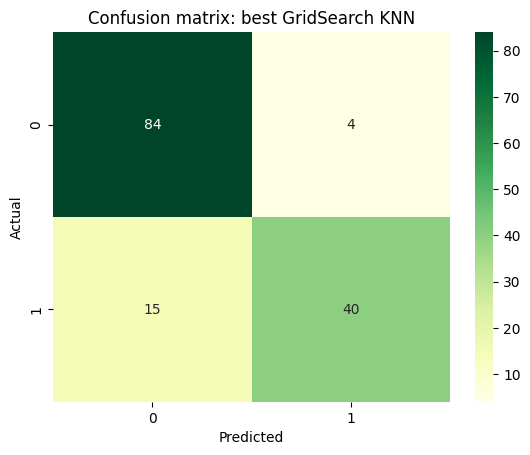

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

param_grid = {
    "n_neighbors": list(range(1, 31, 2)),      # odd Ks: 1,3,5,...,29
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid=param_grid,
    scoring="f1",   # change to "recall" if you want to prioritize recall
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train.values.ravel() if hasattr(y_train, "values") else y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", round(grid.best_score_, 3))

best_knn = grid.best_estimator_
y_pred_grid = best_knn.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred_grid), 2))
print("Test Recall:", round(recall_score(y_test, y_pred_grid), 2))
print("Test F1:", round(f1_score(y_test, y_pred_grid), 2))

sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, cmap="YlGn")
plt.title("Confusion matrix: best GridSearch KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
